# Notebook using approx-cache

In [1]:
import warnings
warnings.filterwarnings('ignore')
import torch
from diffusers.pipelines.stable_diffusion_xl import pipeline_stable_diffusion_xl

pipe = pipeline_stable_diffusion_xl.StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]


## Generate images/noise

### Store intermediate noise cache

In [2]:
path_noise = './noise/0'
cache_prompt = "a photo of an cat riding a horse on mars"
## Generates and stores noise at all K's
cache_image = pipe(prompt =  cache_prompt, store_noises = True, noise_path = path_noise).images[0]

100%|██████████| 50/50 [00:17<00:00,  2.84it/s]


### Generate image from intermediate noise cache

In [3]:
query_prompt = "a photo of an astronaut riding a camel on mars"
num_of_steps_skipped = 15 ## This is K, that is number of steps skipped during generations

image_approx_cache= pipe(prompt = query_prompt,  skip_steps = num_of_steps_skipped, noise_path = path_noise).images[0]

100%|██████████| 35/35 [00:10<00:00,  3.29it/s]


### Generate image from intermediate noise cache

In [4]:
query_prompt = "a photo of an astronaut riding a camel on mars"

image_without_cache = pipe(prompt = query_prompt).images[0]

100%|██████████| 50/50 [00:15<00:00,  3.30it/s]


### Render images 

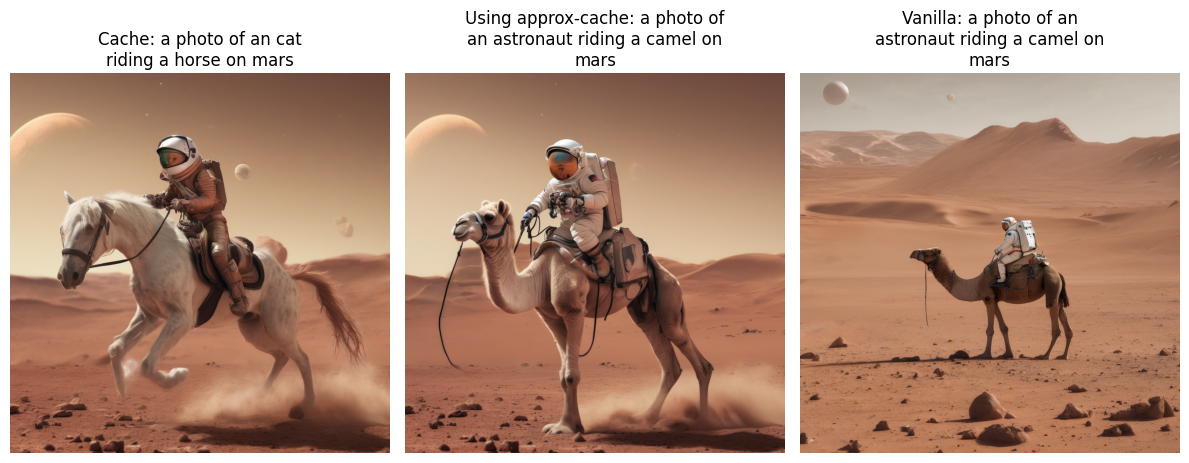

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap  # Import the textwrap module

# Sample images and prompts (replace these with your actual images and prompts)
image1 = cache_image  # Sample image
image2 = image_approx_cache  # Sample image
image3 = image_without_cache  # Sample image


# Wrap the prompts to multiple lines with a maximum width
wrapped_cache_prompt = '\n'.join(textwrap.wrap("Cache: " + cache_prompt, width=30))
wrapped_query_prompt = '\n'.join(textwrap.wrap("Using approx-cache: " + query_prompt, width=30))
wrapped_vanilla_prompt = '\n'.join(textwrap.wrap("Vanilla: " + query_prompt, width=30))

# Create a figure with a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image with its wrapped prompt
axs[0].imshow(image1)
axs[0].set_title(wrapped_cache_prompt)
axs[0].axis('off')

# Display the second image with its wrapped prompt
axs[1].imshow(image2)
axs[1].set_title(wrapped_query_prompt)
axs[1].axis('off')

# Display the third image with its wrapped prompt
axs[2].imshow(image3)
axs[2].set_title(wrapped_vanilla_prompt)
axs[2].axis('off')

# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()